## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>HOMEWORK 12. THUẬT TOÁN TÌM ĐƯỜNG (2)</center>

## Bài Tập: Dò Mìn

Dò Mìn (Minesweeper) là một trò chơi khá nổi tiếng trong hệ điều hành Windows. Luật chơi rất đơn giản: Cho một bản đồ gồm các ô, hãy mở tất cả các ô không chứa mìn. Biết mỗi ô không chứa mìn hiển thị một số nguyên là tổng số mìn trong 8 ô xung quanh nó.  Ô không có số tương ứng với số 0.

Bên dưới là ví dụ của một lượt chơi dò mìn:

![](./assets/gameplay2.gif)

Trong hình minh họa là phiên bản mới được tv trên Microsoft Store. Trò chơi cũng có phiên bản online tại đây: https://minesweeperonline.com/.  

Để đảm bảo người chơi không ấn phải mìn trong click đầu tiên, thuật toán chỉ khởi tạo bản đồ trò chơi sau khi người chơi mở ô đầu. Do đó, nếu ta chọn chơi lại một bản đồ đã được khởi tạo, ta sẽ có khả năng ấn phải mìn.

![](./assets/mine2.gif)

**Yêu cầu**: Cho một bản đồ trò chơi đã được khởi tạo và vị trí click đầu tiên của người dùng. Biết ban đầu mỗi ô đều đóng, hãy mở các ô trong bản đồ theo quy tắc:
- Nếu ô được click là ô 0, mở các ô xung quanh cho đến khi gặp ô số > 0
- Nếu ô được click là ô số > 0, chỉ mở ô đó
- Nếu ô được click là ô mìn, chỉ mở ô đó

**Input**: Một bản đồ 9x9 dưới dạng list chứa các list. Mỗi giá trị trong bản đồ tương ứng với số của mỗi ô, riêng ô mìn có giá trị là -1.  
**Output**: Một list chứa các list với cùng kích thước như bản đồ, với giá trị True thể hiện ô đóng và giá trị False thể hiện ô đã được mở.  

Hàm <code>plot_map()</code> để vẽ bản đồ và bản đồ game đã được cho sẵn bên dưới.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

def plot_map(game_map, cover_map):
    
    # init maps
    n = len(game_map)
    game_map = np.array(game_map)
    mine_map = np.array(game_map).astype(float)
    cover_map = np.array(cover_map).astype(float)
    
    # process maps
    game_map[game_map == -1] = 0
    mine_map[mine_map != -1] = 0
    mine_map[mine_map == -1] = 1
    # cover_map[:, :] = False

    # show value map & mine map
    plt.figure(figsize=(5, 5))
    plt.imshow(game_map, cmap='Blues')
    plt.imshow(mine_map, cmap='coolwarm', alpha=mine_map)
    
    # add texts
    for i in range(n):
        for j in range(n):
            if game_map[i, j] != 0 and cover_map[i, j] != 1:
                color = {True: 'white', False: 'black'}[game_map[i, j] == 3]
                text = plt.text(j, i, game_map[i, j], ha="center", va="center", size=12, color=color)
            if mine_map[i, j] == 1 and cover_map[i, j] != 1:
                text = plt.text(j, i, '✵', ha="center", va="center", size=15, color='white')
    
    # overlay cover map on top
    plt.imshow(cover_map, cmap='Set2', alpha=cover_map)
    
    # draw borders
    for i in range(n-1):
        plt.plot((i+0.5, i+0.5), (-0.5, n-0.5), color='gray')
        plt.plot((-0.5, n-0.5), (i+0.5, i+0.5), color='gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

Bản đồ game đã được khởi tạo trước:


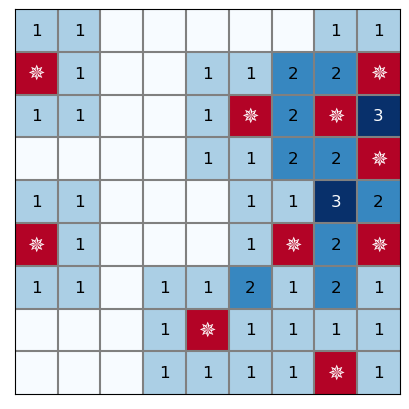

In [3]:
n = 9
game_map = [
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [-1, 1, 0, 0, 1, 1, 2, 2, -1],
    [1, 1, 0, 0, 1, -1, 2, -1, 3],
    [0, 0, 0, 0, 1, 1, 2, 2, -1],
    [1, 1, 0, 0, 0, 1, 1, 3, 2],
    [-1, 1, 0, 0, 0, 1, -1, 2, -1],
    [1, 1, 0, 1, 1, 2, 1, 2, 1],
    [0, 0, 0, 1, -1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1, -1, 1]
]

print('Bản đồ game đã được khởi tạo trước:')
cover_map = [[False]*n for _ in range(n)]
plot_map(game_map, cover_map)

Bản đồ hiển thị với người chơi sau khi click vào ô chứa số:


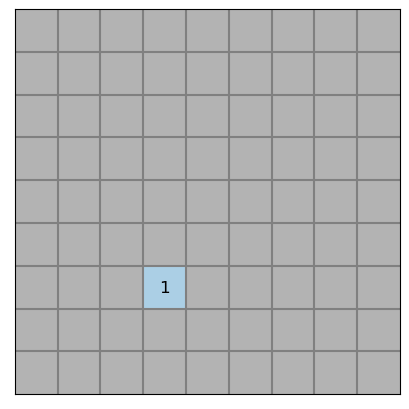

In [9]:
print('Bản đồ hiển thị với người chơi sau khi click vào ô chứa số:')
cover_map = [[True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, False, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True]]
plot_map(game_map, cover_map)

Bản đồ hiển thị với người chơi sau khi click vào ô chứa mìn:


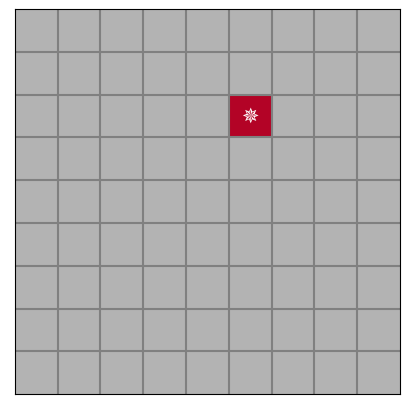

In [5]:
print('Bản đồ hiển thị với người chơi sau khi click vào ô chứa mìn:')
cover_map = [[True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, False, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True]]
plot_map(game_map, cover_map)

Bản đồ hiển thị với người chơi sau khi click vào ô 0:


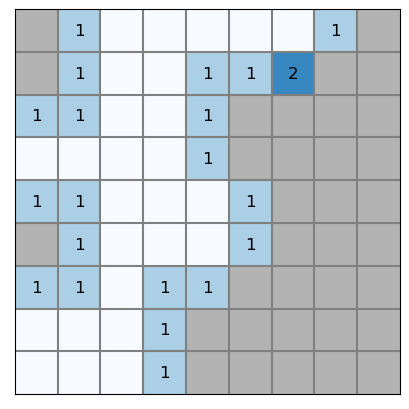

In [6]:
print('Bản đồ hiển thị với người chơi sau khi click vào ô 0:')
cover_map = [[True, False, False, False, False, False, False, False, True], [True, False, False, False, False, False, False, True, True], [False, False, False, False, False, True, True, True, True], [False, False, False, False, False, True, True, True, True], [False, False, False, False, False, False, True, True, True], [True, False, False, False, False, False, True, True, True], [False, False, False, False, False, True, True, True, True], [False, False, False, False, True, True, True, True, True], [False, False, False, False, True, True, True, True, True]]
plot_map(game_map, cover_map)

**Nội dung bài làm**:  
Hoàn thiện hàm <code>uncover()</code> để trả về <code>cover_map</code> là một list của list với định dạng đã nêu phía trên.  
Hàm nhận vào bản đồ trò chơi, <code>row</code> và <code>col</code> là vị trí ô đầu tiên người chơi mở.

Học viên có thể viết thêm bất kì hàm nào khác để hỗ trợ.

In [2]:
def uncover(game_map, row, col):
    
    # YOUR CODE HERE
                
    return cover_map

Kết quả mong đợi như bên dưới:

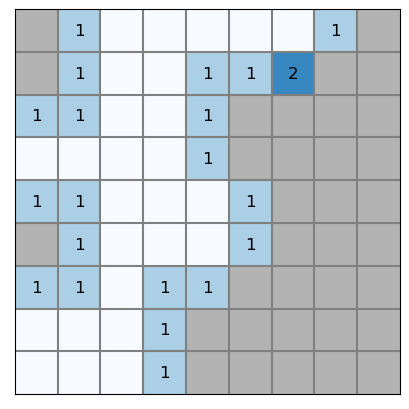

In [16]:
cover_map = uncover(game_map, 1, 2)
plot_map(game_map, cover_map)

==============================================================================